In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [162]:
# criaçao de Dataframe
reviews_df = pd.read_csv('./data/amazon_alexa.tsv', sep = '\t')

In [163]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [164]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


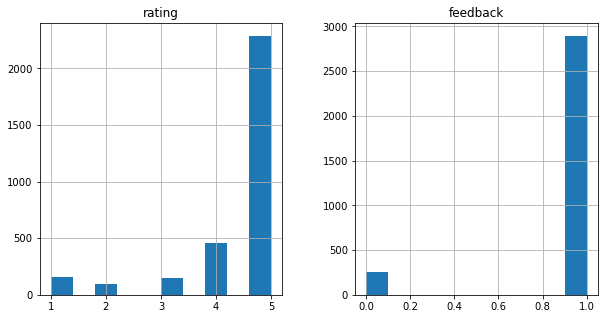

In [165]:
reviews_df.hist(bins=10, figsize=(10,5));

In [166]:
# média de tamanho dos reviews
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


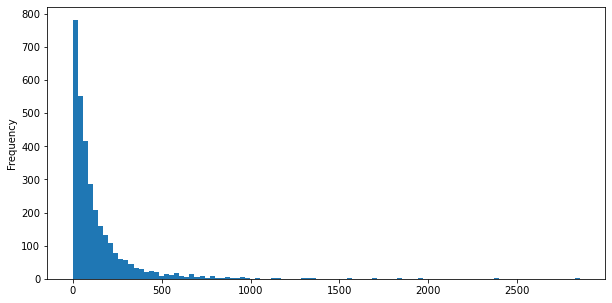

In [167]:
reviews_df['length'].plot(bins=100,kind='hist' , figsize=(10,5));

In [168]:
reviews_df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [169]:
# maior review
reviews_df[reviews_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [170]:
# menor review
reviews_df[reviews_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [171]:
# valores do feedback
reviews_df['feedback'].unique()

array([1, 0], dtype=int64)

In [172]:
# valores do rating
reviews_df['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [173]:
# reviews positivos feedback==1
positive = reviews_df[reviews_df['feedback'] == 1]
negative = reviews_df[reviews_df['feedback'] == 0]

In [174]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [175]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


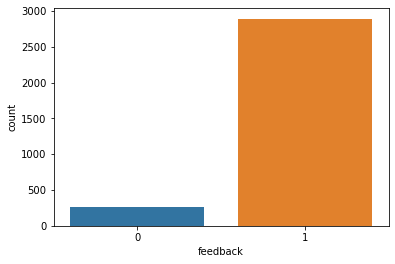

In [176]:
sns.countplot(reviews_df['feedback']);

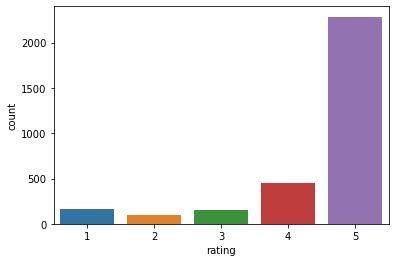

In [177]:
sns.countplot(x='rating', data=reviews_df);

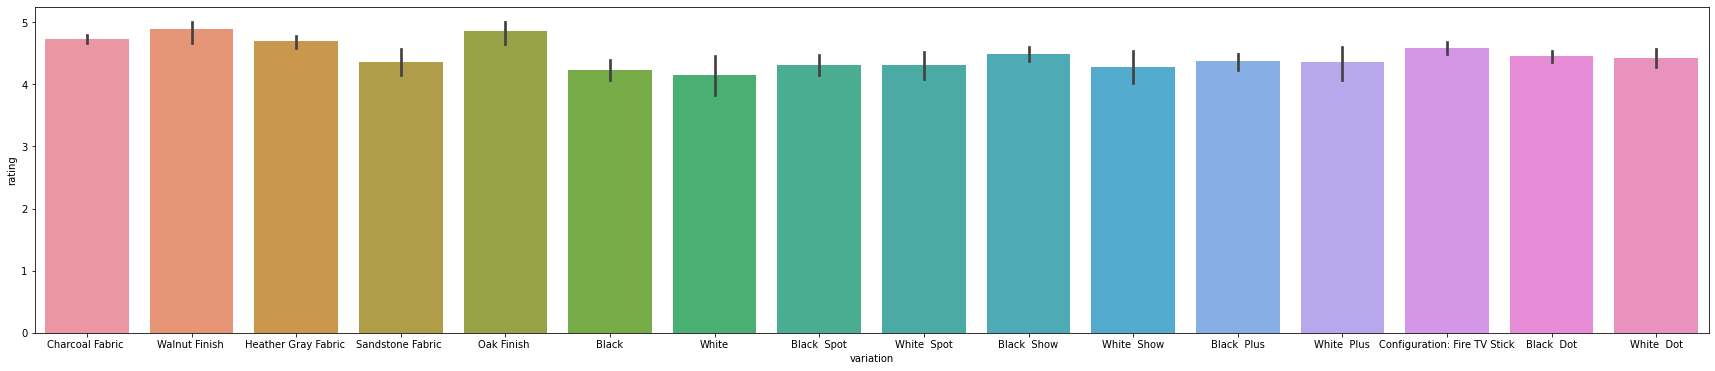

In [178]:
# comparação de variaçao do produto com a avaliação
plt.figure(figsize=(30,6))
sns.barplot(x='variation', y='rating', data=reviews_df);

In [179]:
# geração numero de palavras
sentences = reviews_df['verified_reviews'].to_list()
len(sentences)

3150

In [180]:
print(sentences[0:5])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music']


In [181]:
sentences_as_one_string = ' '.join(sentences)

In [182]:
len(sentences_as_one_string)

419105

In [183]:
from wordcloud import WordCloud

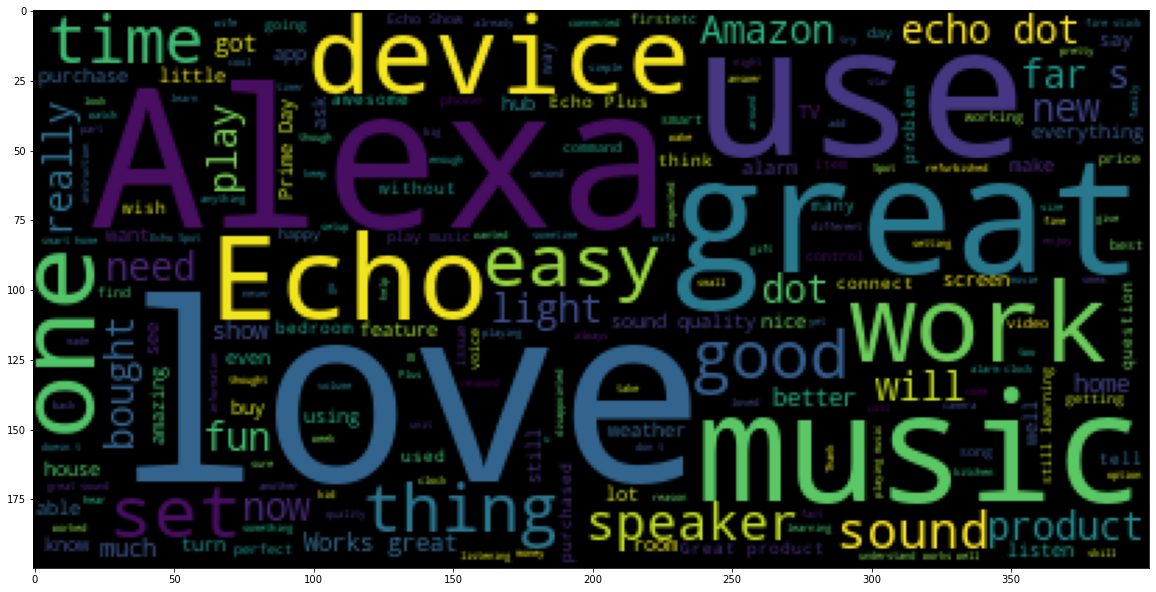

In [184]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

In [185]:
negative_list = negative['verified_reviews'].tolist()
negative_sentences_as_one_string = ' '.join(negative_list)

In [186]:
len(negative_sentences_as_one_string)

55573

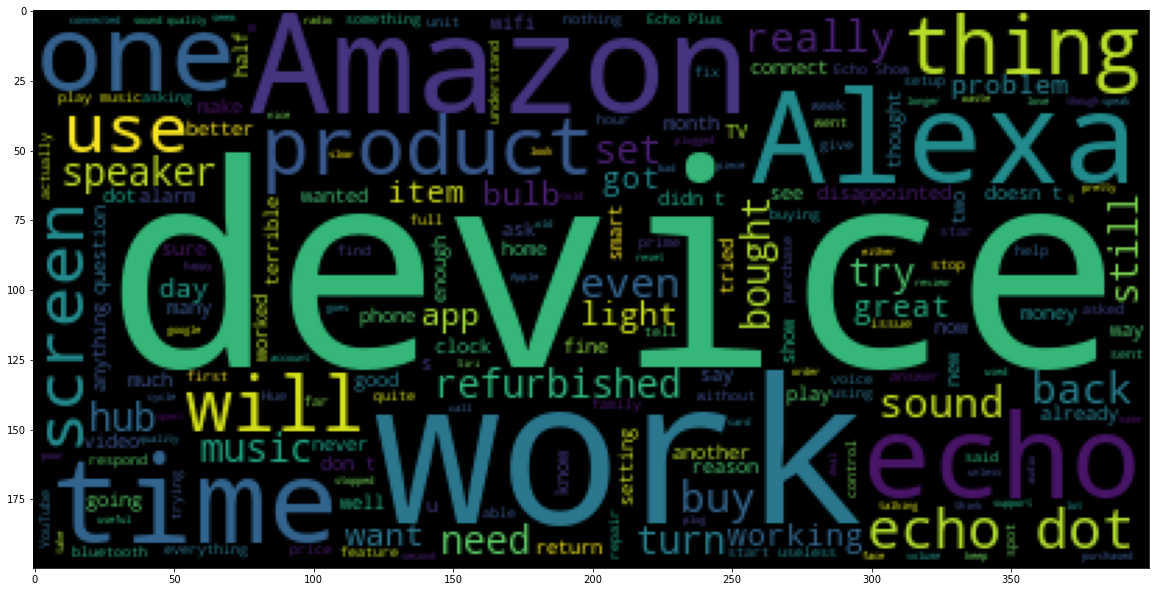

In [187]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

In [188]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [189]:
# apagar colunas que não vou usar
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis=1)
reviews_df.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [190]:
# criação das dummy variables
x_cat = reviews_df[['variation']]
x_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [191]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [192]:
x_cat.shape

(3150, 16)

In [193]:
type(x_cat)

numpy.ndarray

In [194]:
x_cat = pd.DataFrame(x_cat)
type(x_cat)

pandas.core.frame.DataFrame

In [195]:
reviews_df.drop(['variation'], axis=1, inplace=True)

In [196]:
reviews_df

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [197]:
reviews_df = pd.concat([reviews_df, x_cat], axis=1)

In [198]:
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [199]:
# pre processamento nos textos
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [200]:
# teste
teste = 'Sinais de pontuação são recursos prosódicos que conferem às orações ritmo, entoação e pausa, bem como indicam limites sintáticos e unidades de sentido. Na escrita, substituem, em parte, o papel desempenhado pelos gestos na fala, garantindo coesão, coerência e boa compreensão da informação transmitida.'

In [201]:
teste_sem_pontuação = [char for char in teste if char not in string.punctuation]

In [202]:
teste_sem_pontuação

['S',
 'i',
 'n',
 'a',
 'i',
 's',
 ' ',
 'd',
 'e',
 ' ',
 'p',
 'o',
 'n',
 't',
 'u',
 'a',
 'ç',
 'ã',
 'o',
 ' ',
 's',
 'ã',
 'o',
 ' ',
 'r',
 'e',
 'c',
 'u',
 'r',
 's',
 'o',
 's',
 ' ',
 'p',
 'r',
 'o',
 's',
 'ó',
 'd',
 'i',
 'c',
 'o',
 's',
 ' ',
 'q',
 'u',
 'e',
 ' ',
 'c',
 'o',
 'n',
 'f',
 'e',
 'r',
 'e',
 'm',
 ' ',
 'à',
 's',
 ' ',
 'o',
 'r',
 'a',
 'ç',
 'õ',
 'e',
 's',
 ' ',
 'r',
 'i',
 't',
 'm',
 'o',
 ' ',
 'e',
 'n',
 't',
 'o',
 'a',
 'ç',
 'ã',
 'o',
 ' ',
 'e',
 ' ',
 'p',
 'a',
 'u',
 's',
 'a',
 ' ',
 'b',
 'e',
 'm',
 ' ',
 'c',
 'o',
 'm',
 'o',
 ' ',
 'i',
 'n',
 'd',
 'i',
 'c',
 'a',
 'm',
 ' ',
 'l',
 'i',
 'm',
 'i',
 't',
 'e',
 's',
 ' ',
 's',
 'i',
 'n',
 't',
 'á',
 't',
 'i',
 'c',
 'o',
 's',
 ' ',
 'e',
 ' ',
 'u',
 'n',
 'i',
 'd',
 'a',
 'd',
 'e',
 's',
 ' ',
 'd',
 'e',
 ' ',
 's',
 'e',
 'n',
 't',
 'i',
 'd',
 'o',
 ' ',
 'N',
 'a',
 ' ',
 'e',
 's',
 'c',
 'r',
 'i',
 't',
 'a',
 ' ',
 's',
 'u',
 'b',
 's',
 't',
 'i',
 't'

In [203]:
# conversão para string novamente
teste_sem_pontuação = ''.join(teste_sem_pontuação)
teste_sem_pontuação

'Sinais de pontuação são recursos prosódicos que conferem às orações ritmo entoação e pausa bem como indicam limites sintáticos e unidades de sentido Na escrita substituem em parte o papel desempenhado pelos gestos na fala garantindo coesão coerência e boa compreensão da informação transmitida'

In [204]:
import nltk

In [205]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Caíque
[nltk_data]     Miranda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
# palavras que o sentido não ajudam no sentimento do conjunto
# recomendavel remoção na base de dados
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [207]:
teste_sem_stopwords = [word for word in teste_sem_pontuação.split() if word.lower() not in stopwords.words('portuguese')]

In [208]:
print(teste_sem_stopwords)

['Sinais', 'pontuação', 'recursos', 'prosódicos', 'conferem', 'orações', 'ritmo', 'entoação', 'pausa', 'bem', 'indicam', 'limites', 'sintáticos', 'unidades', 'sentido', 'escrita', 'substituem', 'parte', 'papel', 'desempenhado', 'gestos', 'fala', 'garantindo', 'coesão', 'coerência', 'boa', 'compreensão', 'informação', 'transmitida']


In [209]:
# tokenização(cont vectorizer)
from sklearn.feature_extraction.text import CountVectorizer

In [210]:
sample_data = ['Sinais de pontuação são recursos prosódicos que conferem às orações ritmo entoação e pausa bem como indicam limites sintáticos e unidades de sentido Na escrita substituem em parte o papel desempenhado pelos gestos na fala garantindo coesão coerência e boa compreensão da informação transmitida']

In [211]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [212]:
print(vectorizer.get_feature_names())

['bem', 'boa', 'coerência', 'coesão', 'como', 'compreensão', 'conferem', 'da', 'de', 'desempenhado', 'em', 'entoação', 'escrita', 'fala', 'garantindo', 'gestos', 'indicam', 'informação', 'limites', 'na', 'orações', 'papel', 'parte', 'pausa', 'pelos', 'pontuação', 'prosódicos', 'que', 'recursos', 'ritmo', 'sentido', 'sinais', 'sintáticos', 'substituem', 'são', 'transmitida', 'unidades', 'às']


In [213]:
x

<1x38 sparse matrix of type '<class 'numpy.int64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [214]:
print(x.toarray())

[[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1]]


In [215]:
# pipeline e limpeza dos dados
def message_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [216]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [217]:
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [218]:
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [219]:
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [220]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [221]:
len(vectorizer.get_feature_names())

5211

In [222]:
reviews_countvectorizer.shape

(3150, 5211)

In [223]:
# junção com df original
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)

In [224]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [225]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [226]:
type(reviews)

pandas.core.frame.DataFrame

In [227]:
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [228]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
# criação das variaveis x e y
X = reviews_df.drop(['feedback'], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [231]:
# treinamento com naive bayes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [232]:
X_train.shape, X_test.shape

((2520, 5227), (630, 5227))

In [233]:
# algoritmo funciona melhor com valores binarios 
from sklearn.naive_bayes import MultinomialNB

In [234]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [235]:
# funçoes para analise do algoritmo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [236]:
y_pred = naive_bayes.predict(X_test)

In [237]:
accuracy_score(y_test, y_pred)

0.9317460317460318

In [238]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 15,  32],
       [ 11, 572]], dtype=int64)

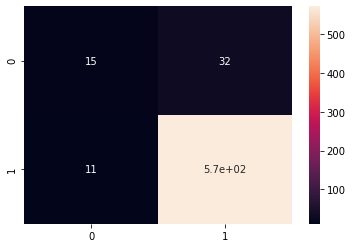

In [239]:
sns.heatmap(cm, annot=True);

In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41        47
           1       0.95      0.98      0.96       583

    accuracy                           0.93       630
   macro avg       0.76      0.65      0.69       630
weighted avg       0.92      0.93      0.92       630



In [245]:
# treinamento usando regressão logistica
from sklearn.linear_model import LogisticRegression

In [246]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [247]:
y_pred = logistic.predict(X_test)

In [248]:
accuracy_score(y_test, y_pred)

0.9444444444444444

In [249]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.34      0.48        47
           1       0.95      0.99      0.97       583

    accuracy                           0.94       630
   macro avg       0.87      0.67      0.72       630
weighted avg       0.94      0.94      0.93       630



In [250]:
# classificação de uma frase
import pickle

In [251]:
with open('./data/text_classifier.pkl', 'wb') as f:
    pickle.dump([naive_bayes, onehotencoder, vectorizer], f)


In [253]:
with open('./data/text_classifier.pkl', 'rb') as f:
    bayes, onehot, vec = pickle.load(f) 

In [254]:
bayes

MultinomialNB()

In [255]:
onehot

OneHotEncoder()

In [256]:
vec

CountVectorizer(analyzer=<function message_cleaning at 0x000001745AFDC700>)

In [257]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [260]:
negative_text = negative.iloc[0:1, [2,3]]

In [261]:
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [262]:
x_cat = negative_text[['variation']]
x_cat

,variation
46,Charcoal Fabric


In [263]:
x_cat = onehot.transform(x_cat).toarray()
x_cat = pd.DataFrame(x_cat)
x_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [270]:
x_cat.index = negative_text.index

In [271]:
negative_df = pd.concat([negative_text, x_cat], axis=1)

In [272]:
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
negative_df.drop(['variation'], axis=1, inplace=True)

In [274]:
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
negative_coutvectorizer = vec.transform(negative_df['verified_reviews'])

In [276]:
negative_coutvectorizer

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [278]:
review = pd.DataFrame(negative_coutvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [277]:
negative_df.drop(['verified_reviews'], axis=1, inplace=True)

In [279]:
negative_df.index = review.index

In [280]:
negative_final = pd.concat([negative_df, review], axis=1)

In [281]:
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
bayes.predict(negative_final)

array([0], dtype=int64)

In [283]:
bayes.predict_proba(negative_final)

array([[0.65292135, 0.34707865]])